<a href="https://colab.research.google.com/github/mohsinziabutt/Applied-AI-Challenge-2/blob/main/NLP_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np

# libraries for data preprocessing
import nltk
# download modules available with NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# libraries for data split and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 

RANDOM_SEED = 100

[nltk_data] Downloading package punkt to C:\Users\Mohsin Zia
[nltk_data]     Butt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mohsin Zia
[nltk_data]     Butt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mohsin Zia
[nltk_data]     Butt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Importing dataset**

In [2]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df = pd.read_csv('https://raw.githubusercontent.com/mohsinziabutt/Applied-AI-Challenge-2/main/dataset/train.csv')

print(df.shape)
df.head()

(16363, 3)


,Id,Text,Sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


# **Checking if there is any sentiment in the column other than negative and positive**

Sentiment
negative    7781
positive    8582
dtype: int64


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

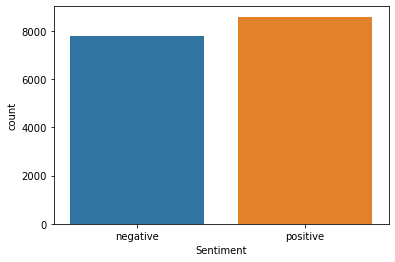

In [3]:
print(df.pivot_table(columns=['Sentiment'], aggfunc='size'))

# Summarise class details
sns.countplot(x=df['Sentiment'])

# **Drop Null Values**

In [4]:
# drop the rows where at least one element is missing
df = df.dropna()
print(f'Number of entries: {len(df)}')

Number of entries: 16363


# **Data Pre-Processing**

**1. Tokenisation**

In [5]:
# iterate through each row in 'Text' columm and convert text to tokens
list_tokenised_text = [word_tokenize(text) for text in df['Text']]
print(list_tokenised_text[:2])

list_tokenised_sentences = [' '.join(tokens) for tokens in list_tokenised_text]
print(list_tokenised_sentences[:2])

# add new column to data frame
df['Tokenised_Text'] = list_tokenised_sentences
df.head()

[['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'here', 'in', 'San', 'Diego', '!', '!', '!'], ['my', 'boss', 'is', 'bullying', 'me', '...']]
['Sooo SAD I will miss you here in San Diego ! ! !', 'my boss is bullying me ...']


,Id,Text,Sentiment,Tokenised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of * * * * , why couldn ` t they put them..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...


**2. Text Normalisation**

In [6]:
wnl = WordNetLemmatizer()

list_lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in list_tokenised_text:
    lemma_words = [wnl.lemmatize(word) for word in tokens]
    lemma_sentence = ' '.join(lemma_words)
    list_lemmatised_sentences.append(lemma_sentence)
  
print(list_lemmatised_sentences[:2])

# add new column to data frame
df['Lemmatised_Text'] = list_lemmatised_sentences

df.head()

['Sooo SAD I will miss you here in San Diego ! ! !', 'my bos is bullying me ...']


,Id,Text,Sentiment,Tokenised_Text,Lemmatised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...,my bos is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of * * * * , why couldn ` t they put them...","Sons of * * * * , why couldn ` t they put them..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...


**3. Stop Words**

In [7]:
# get English stopwords
stop_words = set(stopwords.words('english')) 
print(stop_words)

{'her', 'it', 'his', 'such', 'down', 'out', 'each', 'its', 'other', 'where', 'no', 'yours', 'yourself', 'hadn', 'once', 'is', "shouldn't", "mightn't", 'too', "didn't", 't', 'own', 'itself', 'against', 'wasn', 'an', 'whom', 'mightn', 'because', 'hers', 'off', 'he', 've', 'am', 'him', 'them', 'this', 'y', 'were', 'not', 're', 'shouldn', "isn't", "wasn't", "needn't", 'very', 'as', 'll', 'haven', 'been', 'under', 'will', 'or', 'me', 'from', 'on', 'those', 'further', 'why', 'd', "she's", 'these', 'and', 'any', 'isn', 'are', 'my', "you've", 'of', 'nor', 'there', 'theirs', 'ain', 'between', 'your', 'did', "you'd", 'couldn', 'don', 'doing', 'the', 'who', 'for', 'that', 'above', 'so', 'in', 'herself', 'mustn', "hadn't", 'up', 'before', 'most', "couldn't", 'weren', 'our', "doesn't", 'how', "shan't", 'ours', 'have', 'needn', 'here', 'all', 'didn', 'by', 'having', 'more', "you'll", "you're", 'they', 'some', 'shan', 'while', 'she', 'do', 'm', 'into', 'to', 'ma', "haven't", 'i', 'themselves', 'does'

# Splitting data into Trainin and Testing

In [8]:
# use raw text
X_train_text, X_val_text, y_train, y_val = train_test_split(df['Text'], df['Sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_text)}')
print(f'validation data set size: {len(X_val_text)}')

# use tokenised text
X_train_tokenised_text, X_val_tokenised_text, y_train, y_val = train_test_split(df['Tokenised_Text'], df['Sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_tokenised_text)}')
print(f'validation data set size: {len(X_val_tokenised_text)}')

# use lemmatised text
X_train_lemmatised_text, X_val_lemmatised_text, y_train, y_val = train_test_split(df['Lemmatised_Text'], df['Sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_lemmatised_text)}')
print(f'validation data set size: {len(X_val_lemmatised_text)}')

# define class_names to using with plot_confusion_matrix
class_list = ['positive', 'negative']

training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909


# Confusion Matrix

In [9]:
# method to plot confusion matrix
def plot_confusion_matrix(matrix, class_names):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions, class_names):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=class_names)
  return accuracy, confusion_matrix

# SVM

In [10]:
# method to train and predict using SVM classifier
def get_svm_predictions(X_train, X_val, y_train, y_val, class_names):
    # build model
    clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
    clf.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = clf.predict(X_val)

    # evalution
    accuracy, confusion_matrix = evaluate(y_val, y_pred, class_names)
    print(f'Accuracy: {accuracy}')
    plot_confusion_matrix(confusion_matrix, class_names)

    return clf

**Predicting Model 1**

Accuracy: 0.8602566714198411


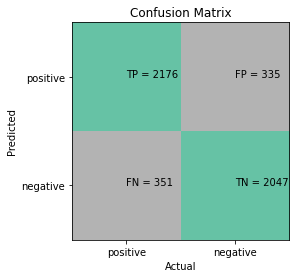

In [11]:
vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m1 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

**Predicting Model 2**

Accuracy: 0.8690160928906091


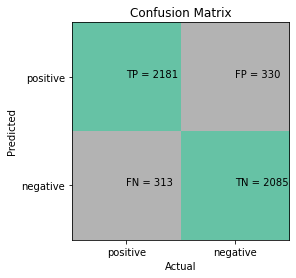

In [12]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m2 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

**Predicting Model 3**

Accuracy: 0.8690160928906091


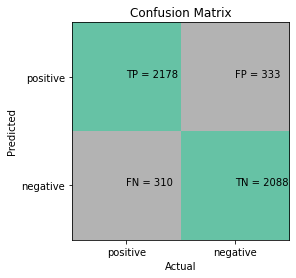

In [13]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m3 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

**Predicting Model 4**

Accuracy: 0.8690160928906091


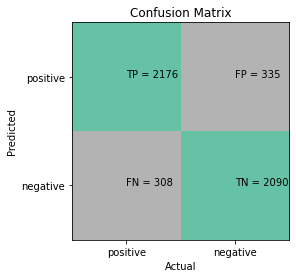

In [14]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m4 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

**Predicting Model 5**

Accuracy: 0.8578121817070686


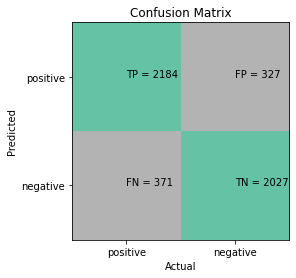

In [15]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m5 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

**Predicting Model 6**

Accuracy: 0.8594418415155837


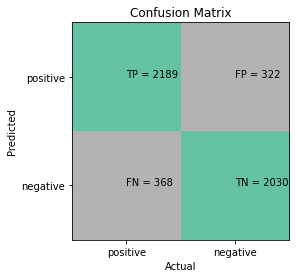

In [16]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m6 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

# Predictions on new Tweets

In [17]:
#import the csv file with tweets to be labelled
new_df = pd.read_csv("https://raw.githubusercontent.com/mohsinziabutt/Applied-AI-Challenge-2/main/dataset/test.csv")
new_df = new_df[["Text"]]

new_df["Sentiment"] = ""

Accuracy: 0.8690160928906091


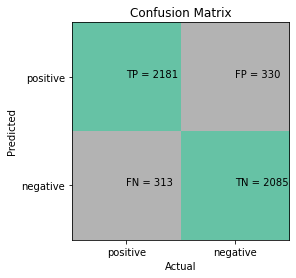

In [19]:
# using the model with higher accuracy rate
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m2 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

In [25]:
X_test = vectorizer.transform(new_df["Text"])
predictions = m2.predict(X_test)
new_df["Sentiment"] = predictions
new_df["Sentiment"].head(20)

0     positive
1     negative
2     positive
3     positive
4     positive
5     negative
6     negative
7     negative
8     negative
9     negative
10    negative
11    negative
12    negative
13    positive
14    negative
15    negative
16    negative
17    negative
18    positive
19    positive
Name: Sentiment, dtype: object

In [26]:
new_df = new_df[['Text', "Sentiment"]]
new_df

,Text,Sentiment
0,Shanghai is also really exciting (precisely -...,positive
1,"Recession hit Veronique Branquinho, she has to...",negative
2,happy bday!,positive
3,http://twitpic.com/4w75p - I like it!!,positive
4,that`s great!! weee!! visitors!,positive
...,...,...
995,Haha...YAY!!! I`M CURED!!!!,positive
996,"Sick, sick, sick. This sucks. i can`t even bre...",negative
997,Adding names to my Twitter account and learnin...,positive
998,ooh thats an early start ive got bed planned...,positive


In [27]:
new_df.to_csv('NewPredictions.csv', header=True, index=False)